# Baixando e Instalando Bibliotecas e Base de Dados para o Estudo de Caso.
***

###Estados Anaizados
  - São Paulo
  - Ceará
  - Amazonas
  - Talvez Brasil

***
Dividir Peso em:
  - Peso elevado - >4000

  - Peso normal - 2500 a 4000

  - Baixo peso - < 2.500 g;

  - Muito baixo - < 1.500 g;

  - Extremo baixo - < 1.000 g

***

Dividir Semans de Gestação em:
  - Pré-termo extremo < 28 semanas

  - muito prematuro - 28-32

  - moderado precoce - 32-34

  - moderado tardio - 34-37

***
Dividir pela classificação de Robson


In [ ]:
#!pip install --upgrade pip
#!sudo apt install libffi-dev
#!sudo pip install PySUS


# How to run a Dash app in Google Colab

## Requirements

### Install ngrok
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

### Run ngrok to tunnel Dash app port 8050 to the outside world. 
### This command runs in the background.
get_ipython().system_raw('./ngrok http 8050 &')

### Get the public URL where you can access the Dash app. Copy this URL.
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

### Install Dash
!pip install jupyter-dash
!pip install dash  # The core dash backend
!pip install dash-html-components  # HTML components
!pip install dash-core-components  # Supercharged components
!pip install dash-table  # Interactive DataTable component (new!)

--2022-10-19 03:27:14--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 54.161.241.46, 54.237.133.81, 52.202.168.65, ...
Connecting to bin.equinox.io (bin.equinox.io)|54.161.241.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13832437 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.19M  18.0MB/s    in 0.7s    

2022-10-19 03:27:16 (18.0 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13832437/13832437]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
Traceback (most recent call last):
  File "<string>", line 1, in <module>
IndexError: list index out of range
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 15.6 MB/s 
     |████████████████████████████████| 357 kB 46.2 MB/s 
     |███████████████

In [ ]:
#from pysus.online_data.sinasc import download, get_available_years # Base de Dados
#import pysus
#from dash import Dash, html, dcc
import matplotlib.pyplot as plt# Biblioteca de gráficos
from matplotlib.patches import Rectangle
import matplotlib
import seaborn as sns# Biblioteca de gráficos
import pandas as pd # Biblioteca de gerencaimento de tabeals
import numpy as np # Biblioteca de Vetores
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures # Biblioteca para tratameto de objetos
from sklearn.impute import SimpleImputer # Completar valores faltantes da tabela
from sklearn.compose import ColumnTransformer # Transormador de Colunas do Sklearn
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from google.colab import drive # Biblioteca para acessar o drive
from scipy import stats # Biblioteca para Estatística

drive.mount('/content/drive')
pd.set_option("display.max_columns", None) # Configurand para mostrar todas as colunas

Mounted at /content/drive


#Análise de Dados
***

## Verificando Anos Válidos para Análise

A biblioteca pysus disponibilisa dadosde 1994 até 2020 de SP

In [ ]:
#get_available_years('SP')

## Convertendo data de .DCB para .csv

Convertendo .DCB para .csv o tamanho dos arquivos reuz consideravelmente, e colocando-os no Google Drive, os mesmos podem ser acessádos facilmente.

In [ ]:
'''anos = np.arange(2011, 2021)
for ano in anos:
  path = '/content/drive/MyDrive/SINASC/Data/SP/SP_' + str(ano) + '.csv'
  df = pd.read_csv(path)
  print(ano, ' ', len(df.columns))

df = None'''


"anos = np.arange(2011, 2021)\nfor ano in anos:\n  path = '/content/drive/MyDrive/SINASC/Data/SP/SP_' + str(ano) + '.csv'\n  df = pd.read_csv(path)\n  print(ano, ' ', len(df.columns))\n\ndf = None"

## Escolhendo as Colunas para Análise


Inicialmente serão obtidos os dados de SP em 2010 até 2020, como a partir desse ano foram coletadas mais colunas(56) para avaliação na base de dados.
O prósito desta análise é relacionar colunas com informações da mãe com a forma de parto(normal ou cesário). Por isso algumas como CEP do município, ID do hospital e colunas relacionadas não serão abordadas.

In [ ]:
'''for i in np.arange(2010, 2020):
  SP = pd.read_csv(f'/content/drive/MyDrive/SINASC/Data/SP/SP_{i}.csv').apply(pd.to_numeric, errors='ignore')
  SP = SP.replace(np.nan, 9)
  try:
    SP['ESCMAE2010']
    print(i)
  except:
    print()'''

In [ ]:
SP = pd.read_csv(f'/content/drive/MyDrive/SINASC/Data/SP/SP_2020.csv').apply(pd.to_numeric, errors='ignore')
SP = SP.replace(np.nan, 9)

SP

,Unnamed: 0,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR
0,0,1,2330830.0,150060,1,24,9.0,4.0,351305.0,0.0,0.0,350950,5.0,1.0,1.0,4.0,30042020,1539.0,1,9.0,10.0,9.0,3850.0,2.0,5052020,9,20210023,3.2.01,5052021.0,370,9.0,9.0,9.0,9.0,3.0,9.0,29011996.0,9.0,0.0,0.0,0.0,9.0,9.0,40.0,9.0,12.0,2.0,1.0,2.0,3.0,2.0,5.0,0.0,30042020.0,12.0,0,1,1,1,0,5,68412
1,1,1,2418657.0,150180,1,24,1.0,4.0,999992.0,0.0,1.0,354140,5.0,1.0,1.0,3.0,19012020,2044.0,1,8.0,9.0,4.0,3660.0,2.0,23012020,9,20200006,3.2.02,30012020.0,11,9.0,815.0,150180.0,15.0,3.0,3.0,25121995.0,4.0,1.0,0.0,0.0,9.0,8042019.0,40.0,8.0,6.0,3.0,1.0,2.0,3.0,2.0,5.0,4.0,19012020.0,6.0,0,1,1,3,1,4,89457
2,2,1,9.0,150360,3,30,5.0,5.0,999992.0,0.0,0.0,354870,5.0,1.0,1.0,3.0,19012020,7.0,1,9.0,9.0,1.0,3200.0,2.0,22012020,9,20200006,3.2.01,24012020.0,5,9.0,843.0,430770.0,43.0,5.0,9.0,10061989.0,1.0,0.0,0.0,0.0,9.0,9.0,39.0,1.0,6.0,6.0,1.0,2.0,3.0,2.0,2.0,3.0,21012020.0,8.0,0,1,1,1,0,2,100618
3,3,1,2755165.0,170210,1,34,1.0,4.0,999992.0,0.0,0.0,351060,5.0,1.0,2.0,3.0,11022020,2144.0,2,8.0,9.0,4.0,2625.0,2.0,12022020,9,20200007,3.2.00,17022020.0,6,9.0,817.0,170382.0,17.0,3.0,3.0,20051985.0,4.0,0.0,0.0,0.0,9.0,9.0,39.0,2.0,4.0,5.0,1.0,2.0,2.0,1.0,5.0,5.0,12022020.0,6.0,0,1,1,1,0,2,138416
4,4,1,2755157.0,172100,1,27,1.0,4.0,999992.0,2.0,0.0,354980,5.0,1.0,2.0,3.0,22012020,1659.0,2,6.0,9.0,4.0,3326.0,2.0,29012020,9,20200005,3.2.00,3022020.0,12,9.0,817.0,170950.0,17.0,2.0,8.0,18071992.0,4.0,2.0,0.0,2.0,9.0,9.0,39.0,9.0,6.0,1.0,1.0,2.0,1.0,1.0,9.0,3.0,22012020.0,4.0,0,1,1,5,1,4,146057
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552305,552305,2,2688433.0,350760,1,21,1.0,4.0,999992.0,1.0,0.0,350760,5.0,1.0,2.0,4.0,1122020,1720.0,1,9.0,10.0,1.0,3620.0,2.0,3122020,9,20200050,3.2.01,9.0,2,9.0,835.0,350760.0,35.0,3.0,3.0,19031999.0,1.0,1.0,0.0,1.0,26.0,9.0,38.0,2.0,8.0,5.0,1.0,2.0,1.0,1.0,2.0,3.0,1122020.0,6.0,0,1,1,5,1,2,2730141
552306,552306,2,2688433.0,350760,1,34,2.0,5.0,234505.0,0.0,2.0,355495,5.0,1.0,2.0,4.0,1122020,1935.0,1,8.0,10.0,1.0,3240.0,2.0,3122020,9,20200050,3.2.01,9.0,2,9.0,835.0,350760.0,35.0,5.0,9.0,27011986.0,1.0,2.0,0.0,0.0,38.0,3032020.0,39.0,8.0,12.0,1.0,2.0,2.0,1.0,1.0,2.0,4.0,1122020.0,8.0,0,1,1,7,1,5,2730142
552307,552307,2,2688433.0,350760,1,23,1.0,4.0,999992.0,2.0,0.0,350760,5.0,1.0,2.0,3.0,1122020,2334.0,2,9.0,10.0,1.0,3345.0,2.0,3122020,9,20200050,3.2.01,9.0,2,9.0,835.0,350410.0,35.0,3.0,1.0,4071997.0,1.0,2.0,0.0,2.0,27.0,9.0,39.0,2.0,5.0,4.0,1.0,2.0,1.0,1.0,2.0,3.0,2122020.0,5.0,0,1,1,5,1,2,2730143
552308,552308,2,3425398.0,420200,1,22,1.0,4.0,999992.0,1.0,0.0,355030,5.0,1.0,2.0,4.0,30052020,1240.0,1,8.0,10.0,1.0,3905.0,2.0,10062020,9,20200024,3.2.02,9.0,11,9.0,811.0,110020.0,11.0,3.0,3.0,9081997.0,1.0,1.0,1.0,0.0,9.0,9.0,39.0,1.0,8.0,2.0,1.0,2.0,1.0,1.0,2.0,3.0,2062020.0,6.0,0,1,1,4,1,5,2730144


In [ ]:
fig = px.choropleth_mapbox(df, geojson=municipios_json, locations='codigo_ibge', color='producao',
                           color_continuous_scale="Greens",
                           mapbox_style="carto-positron",
                           featureidkey="properties.codarea",
                           zoom=4, center = {"lat": -13.089461610967666, "lon": -55.910299337040286},
                           hover_name ='municipios',
                           hover_data=['producao'],
                           height=600
                           
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [ ]:
import requests

url = 'https://servicodados.ibge.gov.br/api/v1/localidades/distritos/'

req = requests.get(url)
json = req.json()

json[0]

{'id': 520005005,
 'nome': 'Abadia de Goiás',
 'municipio': {'id': 5200050,
  'nome': 'Abadia de Goiás',
  'microrregiao': {'id': 52010,
   'nome': 'Goiânia',
   'mesorregiao': {'id': 5203,
    'nome': 'Centro Goiano',
    'UF': {'id': 52,
     'sigla': 'GO',
     'nome': 'Goiás',
     'regiao': {'id': 5, 'sigla': 'CO', 'nome': 'Centro-Oeste'}}}},
  'regiao-imediata': {'id': 520001,
   'nome': 'Goiânia',
   'regiao-intermediaria': {'id': 5201,
    'nome': 'Goiânia',
    'UF': {'id': 52,
     'sigla': 'GO',
     'nome': 'Goiás',
     'regiao': {'id': 5, 'sigla': 'CO', 'nome': 'Centro-Oeste'}}}}}}

In [ ]:
!pip install ibge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from ibge.localidades import *
data = Municipios()

In [ ]:
data[0]

TypeError: ignored

In [ ]:
SP['CODMUNRES']

0         350950
1         354140
2         354870
3         351060
4         354980
           ...  
552305    350760
552306    355495
552307    350760
552308    355030
552309    350570
Name: CODMUNRES, Length: 552310, dtype: int64

## Filtrando e Selecionando Colunas Sócio Economicas


Inicialmete é feita a suposição que exste correlação entre índices socio economicos com a via de parto utilizado. Assim foram selecionádas colunas socio economicas da base de dados.

As colunas categóricas desta base de dados, usando o número '9.0' para representar valores faltantes, trocando estes valores é possível ter maior noção de quantos dados existem nesta base de dados

In [ ]:
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', 1000)

nomes_colunas = np.array(['PARTO', 'PESO', 
                          'GESTACAO', 'ESCMAE2010',
                          'ESTCIVMAE', 'RACACORMAE', 
                          'IDADEMAE',  'IDADEPAI', 
                          'QTDGESTANT', 'QTDPARTNOR', 
                          'QTDPARTCES', 'QTDFILVIVO', 
                          'QTDFILMORT', 'TPROBSON'])


descrição_colunas = np.array(['Via de parto', 'Peso do filho ao nascer em gramas',
                      'Semanas de gestação', 'Escolaridade da mãe', 
                      'Estado civil da mãe', 'Raça da mãe', 
                      'Idade da Mãe', 'Idade do Pai',
                      'Quantidade de gestações', 'Quantidade de partos normais',
                      'Quantidade de parto cesáreos', 'Quantidade de filhos vivos',
                      'Quantidade de filhos Mortos', 'Classificação Robson'])



dominio_colunas = np.array(['1– Vaginal; 2– Cesário; 9– Ignorado.', 'Números real', 
                            '1– Menos de 22 semanas; 2– 22 a 27 semanas; 3– 28 a 31 semanas; 4– 32 a 36 semanas; 5– 37 a 41 semanas; 6– 42 semanas e mais; 9– Ignorado.', '0 – Sem escolaridade; 1 – Fundamental I (1a a 4a série); 2 – Fundamental II (5a a 8a série); 3 –Médio (antigo 2o Grau); 4 – Superior incompleto;5 – Superior completo; 9 – Ignorado',
                            '1– Solteira; 2– Casada; 3– Viúva; 4– Separada judicialmente/divorciada; 5– Uniãoestável; 9– Ignorada', '1– Branca; 2– Preta; 3– Amarela; 4– Parda; 5– Indígena',
                            'Número inteiro', 'Número inteiro', 
                            'Número inteiro', 'Número inteiro', 
                            'Número inteiro', 'Número inteiro', 
                            'Número inteiro', '01 Nulípara, gest un, cefál >37sem, tpespontaneo; \n 02 Nulípara, gest un, cefál >37sem c/ind CS préTP; \n 03 Multípara,(s/ces prev)gest un cef >37semespon; 04 Multíp,(s/ces prev)gest un cef >37s ind/CSpréTP ; \n 05 C/CS ant gestação única, cefálica, > 37 semanas; \n 06 Todos partos pélvicos em nulíparas; \n 07 Todos partos pélv em multíparas (incl CS prévia); \n 08 Todas gest múltiplas (incluindo CS prévia); \n 09 Todas apres anormais (incluindo CS prévia); \n 10 Todas gest unic cefal <36sem (incl CS prévia); \n 11 Nasc n clas por aus resp aos itens necessarios.'])

df_descrição = pd.DataFrame({'Nome': nomes_colunas, 'Descrição': descrição_colunas, 'Domínio': dominio_colunas})


df_descrição.to_csv('descrição.csv')
df_descrição

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,Nome,Descrição,Domínio
0,PARTO,Via de parto,1– Vaginal; 2– Cesário; 9– Ignorado.
1,PESO,Peso do filho ao nascer em gramas,Números real
2,GESTACAO,Semanas de gestação,1– Menos de 22 semanas; 2– 22 a 27 semanas; 3– 28 a 31 semanas; 4– 32 a 36 semanas; 5– 37 a 41 semanas; 6– 42 semanas e mais; 9– Ignorado.
3,ESCMAE2010,Escolaridade da mãe,0 – Sem escolaridade; 1 – Fundamental I (1a a 4a série); 2 – Fundamental II (5a a 8a série); 3 –Médio (antigo 2o Grau); 4 – Superior incompleto;5 – Superior completo; 9 – Ignorado
4,ESTCIVMAE,Estado civil da mãe,1– Solteira; 2– Casada; 3– Viúva; 4– Separada judicialmente/divorciada; 5– Uniãoestável; 9– Ignorada
5,RACACORMAE,Raça da mãe,1– Branca; 2– Preta; 3– Amarela; 4– Parda; 5– Indígena
6,IDADEMAE,Idade da Mãe,Número inteiro
7,IDADEPAI,Idade do Pai,Número inteiro
8,QTDGESTANT,Quantidade de gestações,Número inteiro
9,QTDPARTNOR,Quantidade de partos normais,Número inteiro


## Gráficos para Melhor Visialização dos Dados



In [ ]:

# import required module
import os
# assign directory
directory = '/content/drive/Shareddrives/Data/DATA/'
 
# iterate over files in
# that directory

for ano in np.arange(1994, 2012):
  lista = []
  for filename in os.listdir(directory):
    if filename != 'BRASIL' and filename != 'RA':
      path = f'{directory}{filename}/{filename}_{ano}.csv'
      lista.append(pd.read_csv(path))
      print(path)
      print(filename)
  df = pd.concat(lista)
  df.to_csv(f'/content/drive/MyDrive/TESTES/BR_{ano}.csv')


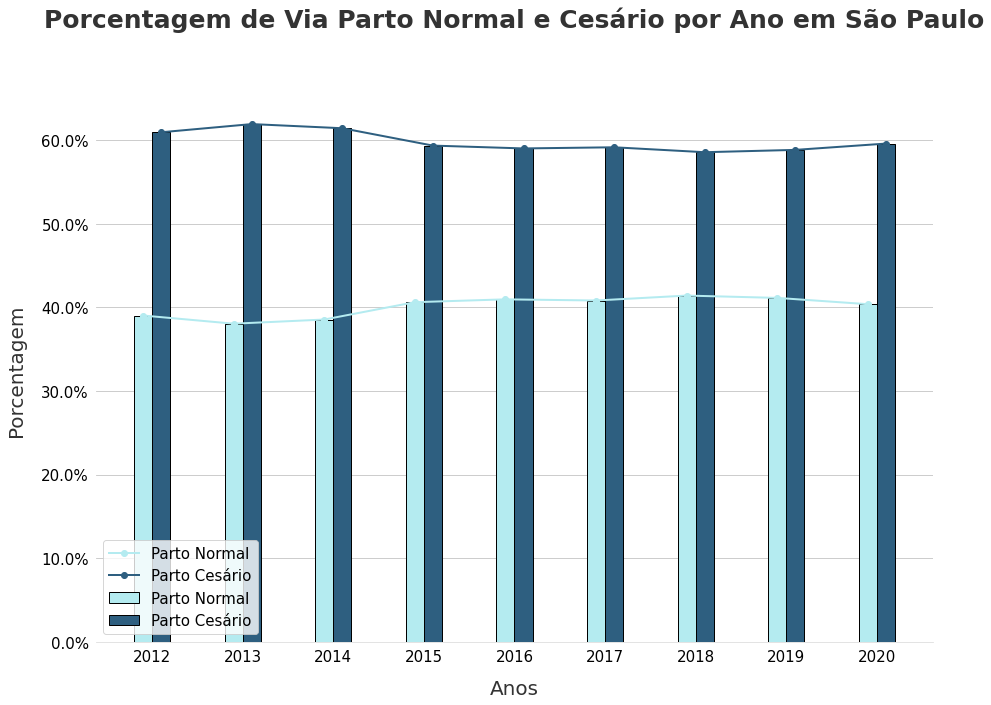

In [ ]:

'''normal = []
cesario = []
for ano in np.arange(2012, 2021):
  df = pd.read_csv(f'//content/drive/Shareddrives/Data/DATA/SP/SP_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  df = df['PARTO'].replace(np.nan, 9.0)
  parto_ano = df.value_counts()
  normal.append(parto_ano[1.0])
  cesario.append(parto_ano[2.0])

normal = np.array(normal)
cesario = np.array(cesario)'''

var     = np.arange(2012, 2021)
fig, ax  = plt.subplots(figsize=(15, 10))
width   = 0.2
ind     = np.arange(len(normal))
graph1  = ax.plot(var - width/2, normal / (normal+cesario), color='#B4EBF0', label='Parto Normal', linewidth=2, marker ='o')
graph2  = ax.bar(var - width/2, normal / (normal+cesario), width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
graph3  = ax.plot(var + width/2, cesario / (normal+cesario), color='#2E5F80', label='Parto Cesário', linewidth=2, marker ='o')
graph4  = ax.bar(var + width/2, cesario / (normal+cesario), width, color='#2E5F80', label='Parto Cesário', edgecolor='black')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
'''ax.patch.set_facecolor('#E1E1E1')
ax.patch.set_alpha(0.5)'''
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#333333', alpha=0.3)
ax.xaxis.grid(False)
plt.xticks(var, fontsize=15 )
plt.yticks( fontsize=15 )
ax.set_yticklabels([ '0.0%', '10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%'])


ax.set_title(f'Porcentagem de Via Parto Normal e Cesário por Ano em São Paulo', color='#333333', weight='bold', fontsize=25, y=1.12)
ax.set_xlabel('Anos', labelpad=15, color='#333333', fontsize=20)
ax.set_ylabel('Porcentagem', labelpad=15, color='#333333', fontsize=20)
ax.legend( fontsize=15)
plt.savefig("Anos-SPss.png", transparent=True, bbox_inches='tight')#, transparent=True)
plt.show()

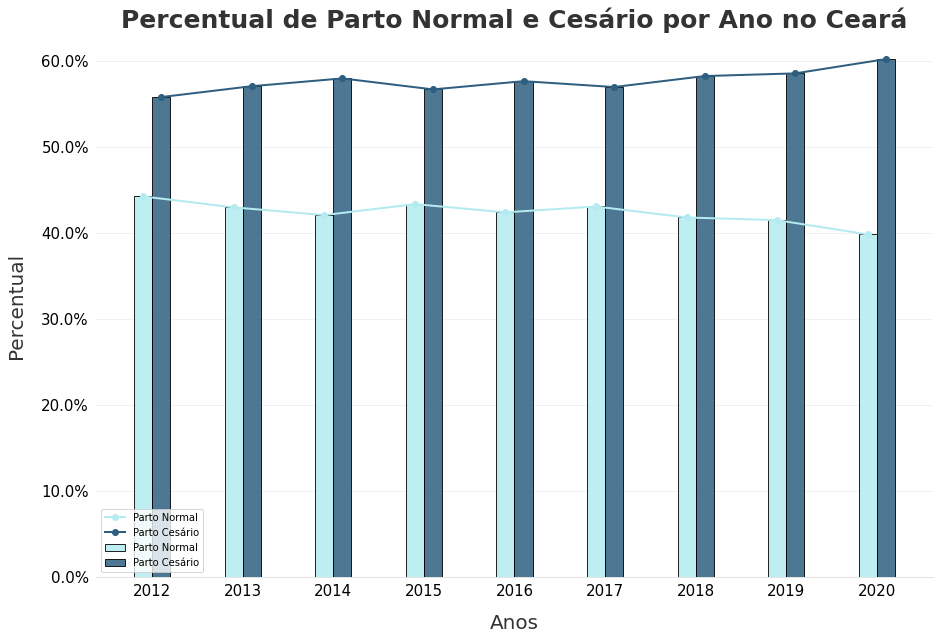

In [ ]:
normal = []
cesario = []
for ano in np.arange(2012, 2021):
  df = pd.read_csv(f'//content/drive/Shareddrives/Data/DATA/CE/CE_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  df = df['PARTO'].replace(np.nan, 9.0)
  parto_ano = df.value_counts()
  normal.append(parto_ano[1.0])
  cesario.append(parto_ano[2.0])

normal = np.array(normal)
cesario = np.array(cesario)

var     = np.arange(2012, 2021)
fig, ax  = plt.subplots(figsize=(15, 10))
width   = 0.2
ind     = np.arange(len(normal))
graph1  = ax.plot(var - width/2, normal / (normal+cesario), color='#B4EBF0', label='Parto Normal', linewidth=2, marker ='o')
graph2  = ax.bar(var - width/2, normal / (normal+cesario), width, color='#B4EBF0', label='Parto Normal', alpha=0.85, edgecolor='black')
graph3  = ax.plot(var + width/2, cesario / (normal+cesario), color='#2E5F80', label='Parto Cesário', linewidth=2, marker ='o')
graph4  = ax.bar(var + width/2, cesario / (normal+cesario), width, color='#2E5F80', label='Parto Cesário', alpha=0.85, edgecolor='black')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xticks(var, fontsize=15 )
plt.yticks( fontsize=15 )
ax.set_yticklabels([ '0.0%', '10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%'])


ax.set_title(f'Percentual de Parto Normal e Cesário por Ano no Ceará', fontsize=25, color='#333333', weight='bold')
ax.set_xlabel('Anos', labelpad=15, color='#333333', fontsize=20)
ax.set_ylabel('Percentual', labelpad=15, color='#333333', fontsize=20)
ax.legend()
plt.savefig("CE_Anos.png", transparent=True)
plt.show()

In [ ]:
normal = []
cesario = []
for ano in np.arange(2012, 2021):
  df = pd.read_csv(f'/content/drive/Shareddrives/Data/DATA/BRASIL/BR_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  df = df['PARTO'].replace(np.nan, 9.0)
  parto_ano = df.value_counts()
  normal.append(parto_ano[1.0])
  cesario.append(parto_ano[0.0])

normal = np.array(normal)
cesario = np.array(cesario)

var     = np.arange(2012, 2021)
fig, ax  = plt.subplots(figsize=(15, 10))
width   = 0.2
ind     = np.arange(len(normal))
graph1  = ax.plot(var - width/2, normal / (normal+cesario), color='#B4EBF0', label='Parto Normal', linewidth=2, marker ='o')
graph2  = ax.bar(var - width/2, normal / (normal+cesario), width, color='#B4EBF0', label='Parto Normal', alpha=0.85, edgecolor='black')
graph3  = ax.plot(var + width/2, cesario / (normal+cesario), color='#2E5F80', label='Parto Cesário', linewidth=2, marker ='o')
graph4  = ax.bar(var + width/2, cesario / (normal+cesario), width, color='#2E5F80', label='Parto Cesário', alpha=0.85, edgecolor='black')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xticks(var, fontsize=15 )
plt.yticks( fontsize=15 )
ax.set_yticklabels([ '0.0%', '10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%'])


ax.set_title(f'Percentual de Parto Normal e Cesário por Ano no Brasil', fontsize=25, color='#333333', weight='bold')
ax.set_xlabel('Anos', labelpad=15, color='#333333', fontsize=20)
ax.set_ylabel('Percentual', labelpad=15, color='#333333', fontsize=20)
ax.legend()
plt.savefig("BR_Anos.png", transparent=True)
plt.show()

In [ ]:
import matplotlib.animation as animation

var     = np.arange(2010, 2021)
fig, ax  = plt.subplots(figsize=(15, 10))
width   = 0.2
ind     = np.arange(len(normal))
graph1  = ax.plot(var - width/2, normal / (normal+cesario), color='#B4EBF0', label='Parto Normal', linewidth=2, marker ='o')
graph2  = ax.bar(var - width/2, normal / (normal+cesario), width, color='#B4EBF0', label='Parto Normal', alpha=1, edgecolor='black')
graph3  = ax.plot(var + width/2, cesario / (normal+cesario), color='#2E5F80', label='Parto Cesário', linewidth=2, marker ='o')
graph4  = ax.bar(var + width/2, cesario / (normal+cesario), width, color='#2E5F80', label='Parto Cesário', alpha=1, edgecolor='black')


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)

ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
plt.xticks(var, fontsize=15 )
plt.yticks( fontsize=15 )
ax.set_yticklabels([ '0.0%', '10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%'])


ax.set_title(f'Taxa de Parto Normal e Cesário por Ano', fontsize=25, color='#333333', weight='bold')
ax.set_xlabel('Anos', labelpad=15, color='#333333', fontsize=20)
ax.set_ylabel('Ocorrência', labelpad=15, color='#333333', fontsize=20)
ax.legend()
plt.show()

1 - Via de parto por semana de gestação.

2 - Adicionar análise do Brasil todo, Ceara e São Paulo.

3 - Gráficos.

4 - ML para predição do Peso(Classificação e Regressão) e Prematuridade(Classificação e Regressão) com somente variáveis vistas antes do parto:

    - DTULTMENST
    - MESPRENAT
    - CONSULTAS
    - GRAVIDEZ
    - STCESPARTO
    - SEMAGESTAC

5 - Um csv de 2011 até 2021 Sudeste.

In [ ]:
"""
colunas_categoricas = ['TPNASCASSI', 'PARTO', 'ESCMAE2010', 'ESTCIVMAE', 
                       'RACACORMAE', 'MESPRENAT', 'CONSULTAS', 
                       'GRAVIDEZ', 'STTRABPART']

colunas_numericas = ['PESO', 'SEMAGESTAC',  'DTULTMENST', 'IDADEMAE', 
                     'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'QTDFILVIVO', 
                     'QTDFILMORT']

colunas_dummies = ['TPNASCASSI', 'ESCMAE2010', 'ESTCIVMAE', 'RACACORMAE', 
                   'MESPRENAT', 'CONSULTAS', 'GRAVIDEZ']

todas_colunas = ['TPNASCASSI', 'PARTO', 'ESCMAE2010', 'ESTCIVMAE', 'RACACORMAE', 'MESPRENAT', 
                'CONSULTAS', 'PESO', 'SEMAGESTAC', 'GRAVIDEZ', 'STTRABPART', 'DTULTMENST'
                ,'IDADEMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 
               'QTDFILVIVO', 'QTDFILMORT']
"""


colunas_categoricas = ['TPNASCASSI', 'PARTO', 'ESCMAE2010', 'ESTCIVMAE', 
                       'RACACORMAE', 'MESPRENAT', 'CONSULTAS', 
                       'GRAVIDEZ', 'STTRABPART']

colunas_numericas = ['PESO', 'SEMAGESTAC',  'DTULTMENST', 'IDADEMAE', 
                     'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'QTDFILVIVO', 
                     'QTDFILMORT']

colunas_dummies = ['TPNASCASSI', 'ESCMAE2010', 'ESTCIVMAE', 'RACACORMAE', 
                   'MESPRENAT', 'CONSULTAS', 'GRAVIDEZ']

todas_colunas = ['TPNASCASSI', 'PARTO', 'ESCMAE2010', 'ESTCIVMAE', 'RACACORMAE', 'MESPRENAT', 
                'CONSULTAS', 'PESO', 'SEMAGESTAC', 'GRAVIDEZ', 'STTRABPART', 'DTULTMENST'
                ,'IDADEMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 
               'QTDFILVIVO', 'QTDFILMORT']
selecao_colunas = ['TPNASCASSI', 'ESCMAE2010', 'ESTCIVMAE', 
                       'RACACORMAE', 'CONSULTAS', 
                       'GRAVIDEZ',]
 
def criarColunaPrematuro(df):
  if df['SEMAGESTAC'] >= 40:
    return 0
  elif df['SEMAGESTAC'] < 40:
    return 1

def criarColunaPeso(df):
  if (df['PESO'] <= 1000.):
    return 0
  elif ((df['PESO'] > 1000.) & (df['PESO'] <= 1500.)):
    return 1
  elif( (df['PESO'] > 1500.) & (df['PESO'] <= 2000.)):
    return 2
  elif ((df['PESO'] > 2000.) & (df['PESO'] <= 2500.)):
    return 3
  elif ((df['PESO'] > 2500.) & (df['PESO'] <= 3000.)):
    return 4
  elif (df['PESO'] > 3000.):
    return 5

def criarColunaCATIDADMAE(df):

  if (df['IDADEMAE'] <= 14):
    return 0
  elif ((df['IDADEMAE'] >= 15) & (df['IDADEMAE'] <= 20)):
    return 1
  elif( (df['IDADEMAE'] >= 21) & (df['IDADEMAE'] <= 30)):
    return 2
  elif ((df['IDADEMAE'] >= 31) & (df['IDADEMAE'] <= 40)):
    return 3
  elif ((df['IDADEMAE'] >= 41) & (df['IDADEMAE'] <= 50)):
    return 4
  elif (df['IDADEMAE'] >= 51):
    return 5


SP = pd.read_csv(f'/content/drive/Shareddrives/Data/DATA/SP/SP_2020.csv').apply(pd.to_numeric, errors='ignore')
SP['PARTO'] = SP['PARTO'].replace({1.0:1.0, 2.0:0.0})
SP['PARTO'] = SP['PARTO'].replace(9.0, np.nan)
SP['MESPRENAT'].replace(99.0, np.nan)
SP['STTRABPART'] = SP['STTRABPART'].replace({1.0:1.0, 2.0:0.0})
SP["NASCPREMAT"] = SP.apply(lambda row: criarColunaPrematuro(row), axis=1)
SP["CATPESO"] = SP.apply(lambda row: criarColunaPeso(row), axis=1)
SP['CATIDADEMAE'] = SP.apply(lambda row: criarColunaCATIDADMAE(row), axis=1)
SP

,Unnamed: 0,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,CODMUNRES,GESTACAO,GRAVIDEZ,PARTO,CONSULTAS,DTNASC,HORANASC,SEXO,APGAR1,APGAR5,RACACOR,PESO,IDANOMAL,DTCADASTRO,CODANOMAL,NUMEROLOTE,VERSAOSIST,DTRECEBIM,DIFDATA,DTRECORIGA,NATURALMAE,CODMUNNATU,CODUFNATU,ESCMAE2010,SERIESCMAE,DTNASCMAE,RACACORMAE,QTDGESTANT,QTDPARTNOR,QTDPARTCES,IDADEPAI,DTULTMENST,SEMAGESTAC,TPMETESTIM,CONSPRENAT,MESPRENAT,TPAPRESENT,STTRABPART,STCESPARTO,TPNASCASSI,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK,CONTADOR,NASCPREMAT,CATPESO,CATIDADEMAE
0,0,1,2330830.0,150060,1,24,NaN,4.0,351305.0,0.0,0.0,350950,5.0,1.0,1.0,4.0,30042020,1539.0,1,9.0,10.0,NaN,3850.0,2.0,5052020,NaN,20210023,3.2.01,5052021.0,370,NaN,NaN,NaN,NaN,3.0,NaN,29011996.0,NaN,0.0,0.0,0.0,NaN,NaN,40.0,9.0,12.0,2.0,1.0,0.0,3.0,2.0,5.0,0.0,30042020.0,12.0,0,1,1,1,0,5,68412,0.0,5.0,2
1,1,1,2418657.0,150180,1,24,1.0,4.0,999992.0,0.0,1.0,354140,5.0,1.0,1.0,3.0,19012020,2044.0,1,8.0,9.0,4.0,3660.0,2.0,23012020,NaN,20200006,3.2.02,30012020.0,11,NaN,815.0,150180.0,15.0,3.0,3.0,25121995.0,4.0,1.0,0.0,0.0,NaN,8042019.0,40.0,8.0,6.0,3.0,1.0,0.0,3.0,2.0,5.0,4.0,19012020.0,6.0,0,1,1,3,1,4,89457,0.0,5.0,2
2,2,1,NaN,150360,3,30,5.0,5.0,999992.0,0.0,0.0,354870,5.0,1.0,1.0,3.0,19012020,7.0,1,NaN,NaN,1.0,3200.0,2.0,22012020,NaN,20200006,3.2.01,24012020.0,5,NaN,843.0,430770.0,43.0,5.0,NaN,10061989.0,1.0,0.0,0.0,0.0,NaN,NaN,39.0,1.0,6.0,6.0,1.0,0.0,3.0,2.0,2.0,3.0,21012020.0,8.0,0,1,1,1,0,2,100618,1.0,5.0,2
3,3,1,2755165.0,170210,1,34,1.0,4.0,999992.0,0.0,0.0,351060,5.0,1.0,0.0,3.0,11022020,2144.0,2,8.0,9.0,4.0,2625.0,2.0,12022020,NaN,20200007,3.2.00,17022020.0,6,NaN,817.0,170382.0,17.0,3.0,3.0,20051985.0,4.0,0.0,0.0,0.0,NaN,NaN,39.0,2.0,4.0,5.0,1.0,0.0,2.0,1.0,5.0,5.0,12022020.0,6.0,0,1,1,1,0,2,138416,1.0,4.0,3
4,4,1,2755157.0,172100,1,27,1.0,4.0,999992.0,2.0,0.0,354980,5.0,1.0,0.0,3.0,22012020,1659.0,2,6.0,9.0,4.0,3326.0,2.0,29012020,NaN,20200005,3.2.00,3022020.0,12,NaN,817.0,170950.0,17.0,2.0,8.0,18071992.0,4.0,2.0,0.0,2.0,NaN,NaN,39.0,9.0,6.0,1.0,1.0,0.0,1.0,1.0,NaN,3.0,22012020.0,4.0,0,1,1,5,1,4,146057,1.0,5.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552305,552305,2,2688433.0,350760,1,21,1.0,4.0,999992.0,1.0,0.0,350760,5.0,1.0,0.0,4.0,1122020,1720.0,1,9.0,10.0,1.0,3620.0,2.0,3122020,NaN,20200050,3.2.01,NaN,2,NaN,835.0,350760.0,35.0,3.0,3.0,19031999.0,1.0,1.0,0.0,1.0,26.0,NaN,38.0,2.0,8.0,5.0,1.0,0.0,1.0,1.0,2.0,3.0,1122020.0,6.0,0,1,1,5,1,2,2730141,1.0,5.0,2
552306,552306,2,2688433.0,350760,1,34,2.0,5.0,234505.0,0.0,2.0,355495,5.0,1.0,0.0,4.0,1122020,1935.0,1,8.0,10.0,1.0,3240.0,2.0,3122020,NaN,20200050,3.2.01,NaN,2,NaN,835.0,350760.0,35.0,5.0,NaN,27011986.0,1.0,2.0,0.0,0.0,38.0,3032020.0,39.0,8.0,12.0,1.0,2.0,0.0,1.0,1.0,2.0,4.0,1122020.0,8.0,0,1,1,7,1,5,2730142,1.0,5.0,3
552307,552307,2,2688433.0,350760,1,23,1.0,4.0,999992.0,2.0,0.0,350760,5.0,1.0,0.0,3.0,1122020,2334.0,2,9.0,10.0,1.0,3345.0,2.0,3122020,NaN,20200050,3.2.01,NaN,2,NaN,835.0,350410.0,35.0,3.0,1.0,4071997.0,1.0,2.0,0.0,2.0,27.0,NaN,39.0,2.0,5.0,4.0,1.0,0.0,1.0,1.0,2.0,3.0,2122020.0,5.0,0,1,1,5,1,2,2730143,1.0,5.0,2
552308,552308,2,3425398.0,420200,1,22,1.0,4.0,999992.0,1.0,0.0,355030,5.0,1.0,0.0,4.0,30052020,1240.0,1,8.0,10.0,1.0,3905.0,2.0,10062020,NaN,20200024,3.2.02,NaN,11,NaN,811.0,110020.0,11.0,3.0,3.0,9081997.0,1.0,1.0,1.0,0.0,NaN,NaN,39.0,1.0,8.0,2.0,1.0,0.0,1.0,1.0,2.0,3.0,2062020.0,6.0,0,1,1,4,1,5,2730144,1.0,5.0,2


In [ ]:
'''for coluna in selecao_colunas:
  normal_prob = SP['PARTO'].value_counts()[1.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
  cesario_prob = SP['PARTO'].value_counts()[0.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
  SP[coluna] = SP[coluna].replace(9, np.nan)
  SP.dropna()
  crosstable = pd.crosstab(index=SP['PARTO'], columns=SP[coluna])
  var = crosstable.columns.to_numpy()
  normal = crosstable.iloc[1].to_numpy()
  cesario = crosstable.iloc[0].to_numpy()

  fig, ax = plt.subplots(figsize=(15, 10))
  width = 0.4
  ind = np.arange(len(normal))

  graph1 = ax.bar(var - width/2, normal / (normal + cesario), width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
  graph2 = ax.bar(var + width/2, cesario / (normal + cesario), width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
  graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
  graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')


  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)
  ax.set_xticks(var)
  plt.xticks(fontsize=15 )
  plt.yticks(fontsize=15 )



  ax.set_title(f'Distribuição de Parto pelo {coluna} em São Paulo 2020', pad=15, color='#333333', weight='bold', fontsize=20)
  ax.set_xlabel(f'{coluna}', labelpad=15, color='#333333', fontsize=20, weight='bold')
  ax.set_ylabel('Ocorrência', labelpad=15, color='#333333', fontsize=20, weight='bold')
  ax.legend(fontsize = 12, loc='lower right')
  plt.show()
  #ax.figure.savefig('Escmae.png', transparent=True)
  print()'''

## Colunas
Slide 1: Serie Temporal (scatter) do % de partos vaginal e partos normais nos últimos 10 anos:
- SP, CE, BRA
1 - Serie Temporal  do % de partos vaginal e partos normais nos últimos 10 anos:
- SP, CE, BRA
Cristiano Torezzan21:07
1 - Serie Temporal  do % de partos cesarep e partos normais nos últimos 10 anos:
- SP, CE, BRA
1 - Serie Temporal  do % de partos cesáreo e partos normais nos últimos 10 anos:
- SP, CE, BRA
Cristiano Torezzan21:10
2 - Variáveis aderentes:
- ESCOLARIDADE
- IDADE MAE
- EST. CIVIL
- RACA/COR

3 - Investigar:
- PESO AO NASCER
- CONSULTAS
- APGAR

## Escolaridade da Mãe

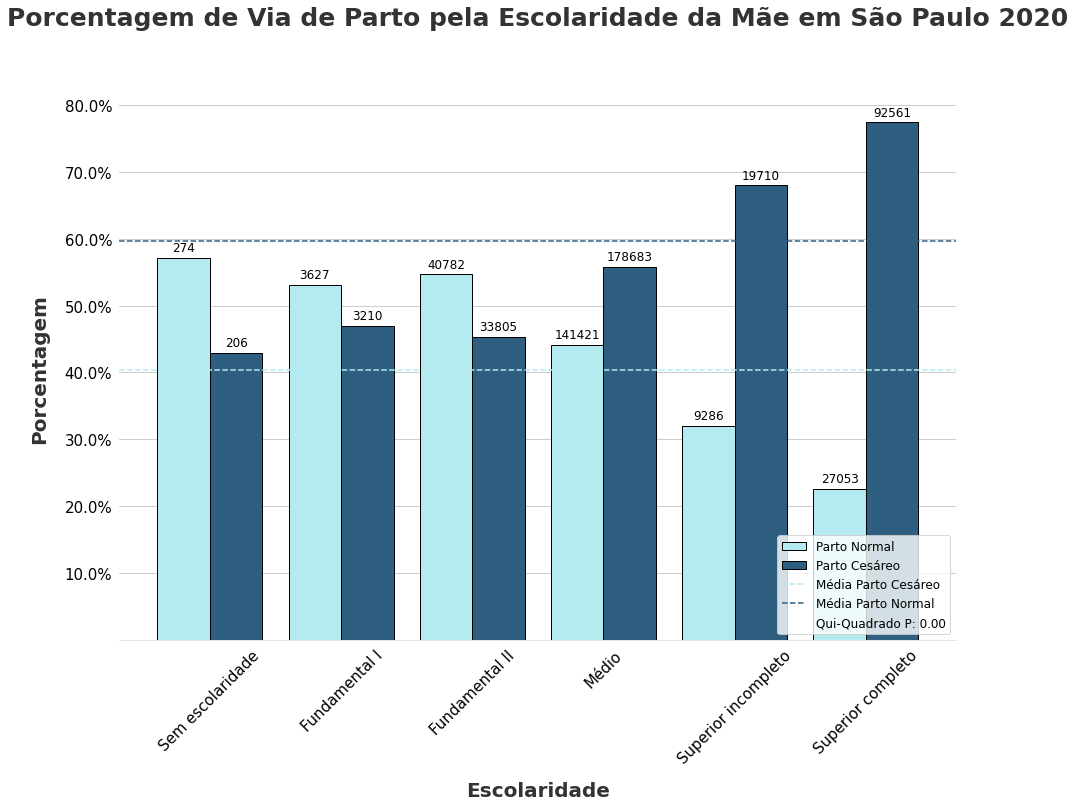

In [ ]:
normal_prob = SP['PARTO'].value_counts()[1.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
cesario_prob = SP['PARTO'].value_counts()[0.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
SP['ESCMAE2010'] = SP['ESCMAE2010'].replace(9, np.nan)
SP.dropna()
crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['ESCMAE2010'])
var = crosstable.columns.to_numpy()
normal = crosstable.iloc[1].to_numpy()
cesario = crosstable.iloc[0].to_numpy()
taxa_normal = normal / (normal + cesario)
taxa_cesario = cesario / (normal + cesario)
chi2, p, dof, expected = stats.chi2_contingency(crosstable)


fig, ax = plt.subplots(figsize=(15, 10))
width = 0.4
ind = np.arange(len(normal))

graph1 = ax.bar(var - width/2, taxa_normal, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
for x, y in zip(var, taxa_normal):
  ax.text(x - width/2, y+0.01, normal[int(x)], ha='center', fontsize=12)
graph2 = ax.bar(var + width/2, taxa_cesario, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
for x, y in zip(var, taxa_cesario):
  ax.text(x + width/2, y+0.01, cesario[int(x)], ha='center', fontsize=12)
graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#333333', alpha=0.3)
ax.xaxis.grid(False)
ax.set_xticks(var)
plt.xticks(fontsize=15 )
plt.yticks(np.arange(0.1, 0.9, 0.1), fontsize=15 )
ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'])
ax.set_xticklabels(['Sem escolaridade',' Fundamental I', 'Fundamental II' , 
                    'Médio', 'Superior incompleto', 'Superior completo'], rotation=45)

ax.set_title(f'Porcentagem de Via de Parto pela Escolaridade da Mãe em São Paulo 2020', color='#333333', weight='bold', fontsize=25, y=1.12)
ax.set_xlabel(f'Escolaridade', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.set_ylabel('Porcentagem', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.legend([graph1, graph2, graph3, graph4, extra], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal', f'Qui-Quadrado P: {p:.2f}'], fontsize = 12, loc='lower right')
plt.savefig('ESCMAE_SP_2020.png', transparent=True, bbox_inches='tight')
plt.show()

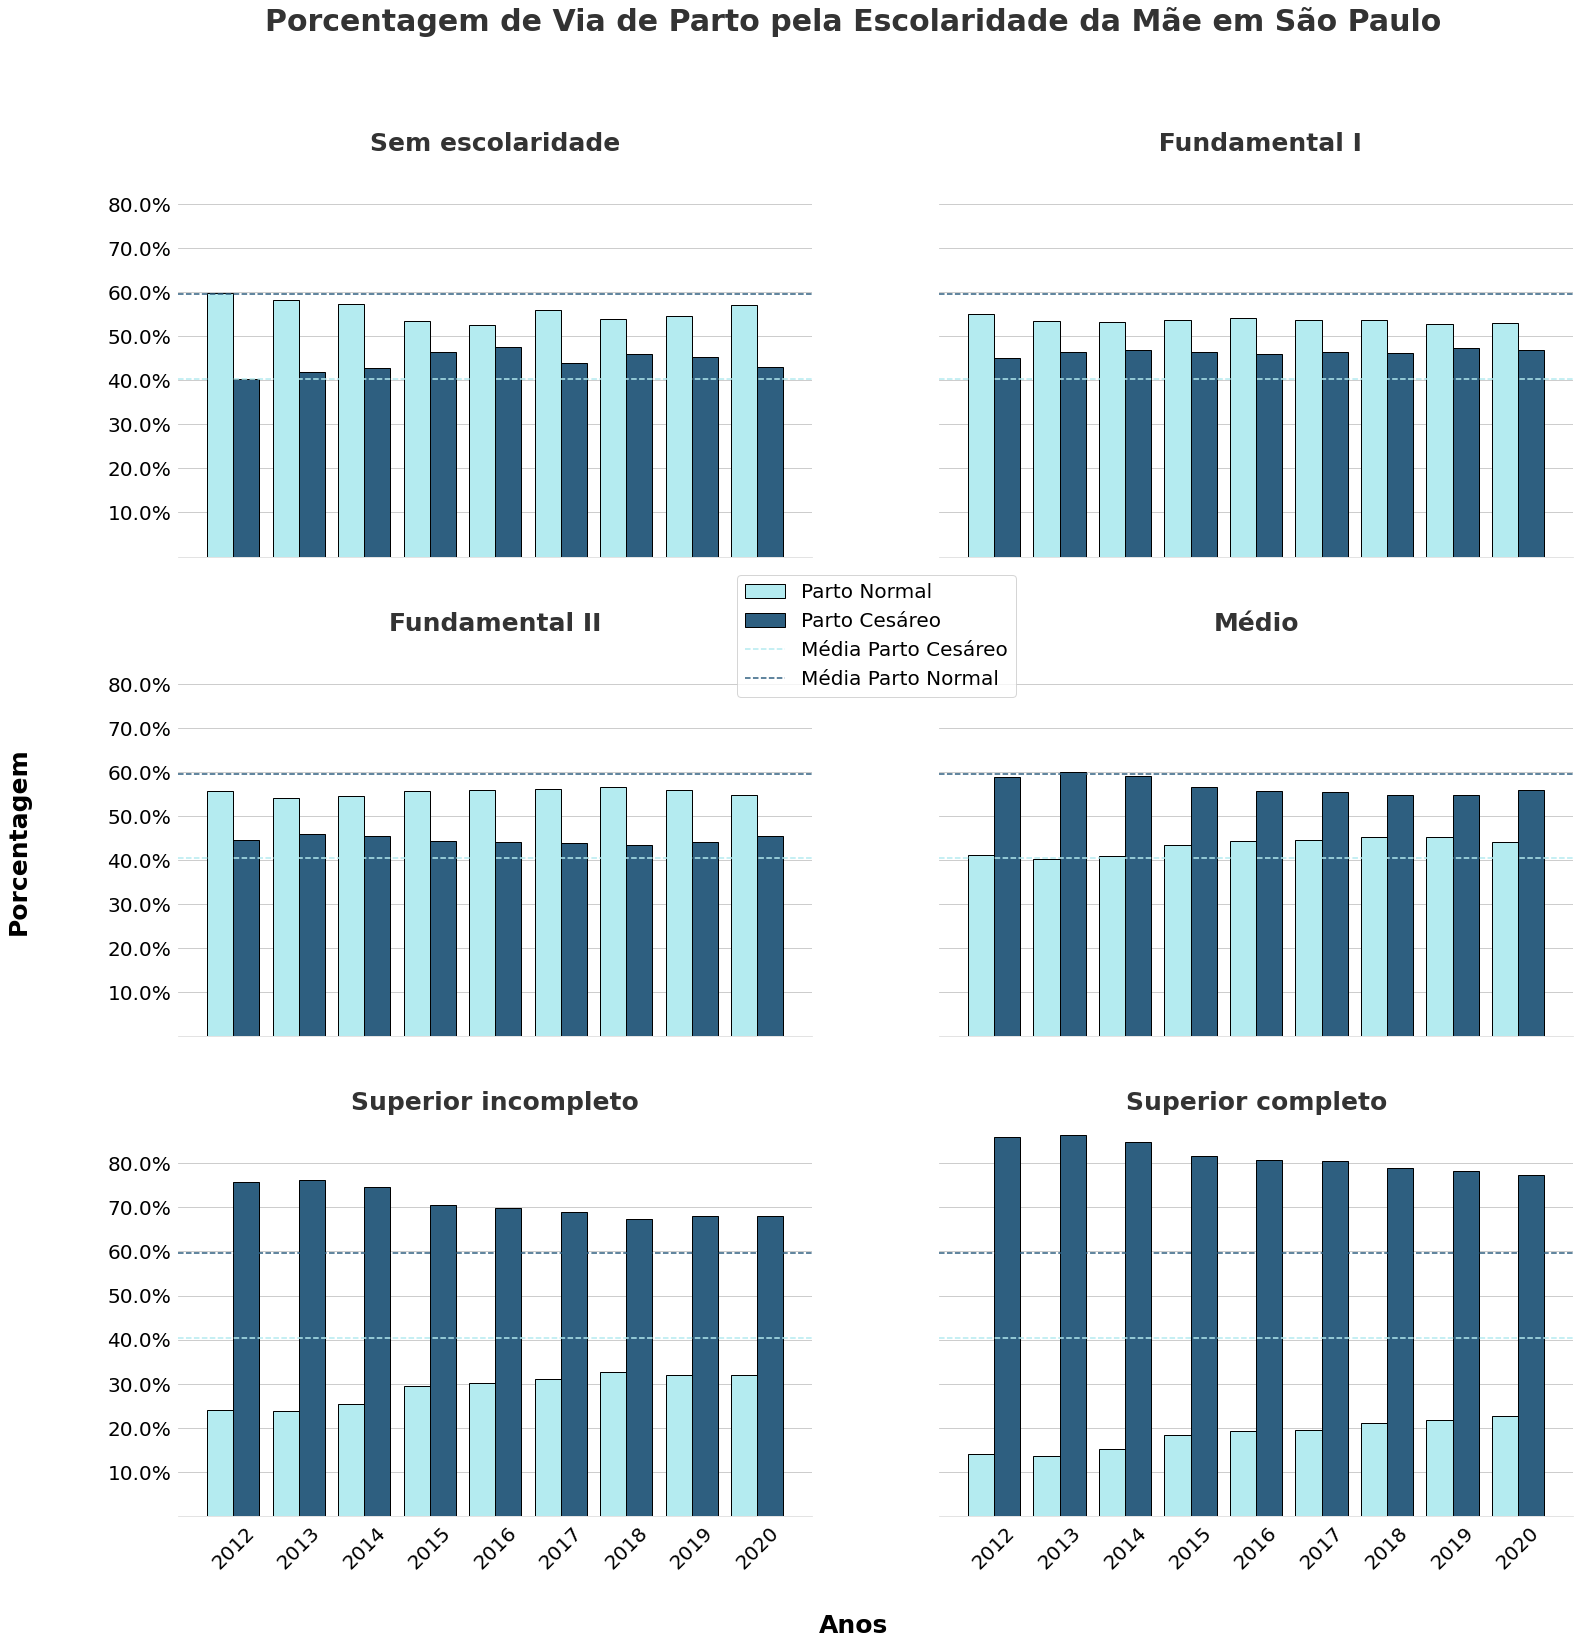

In [ ]:
'''anos =  np.arange(2012, 2021)
for ano in anos:
  SP = pd.read_csv(f'/content/drive/Shareddrives/Data/DATA/SP/SP_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  SP['PARTO'] = SP['PARTO'].replace({1.0:1.0, 2.0:0.0})
  SP['PARTO'] = SP['PARTO'].replace(9.0, np.nan)
  SP['ESCMAE2010'] = SP['ESCMAE2010'].replace(9.0, np.nan)
  SP.dropna(axis=1)
  if anos[0] == ano:
    crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['ESCMAE2010'])
  else:
    crosstable_ano = pd.crosstab(index=SP['PARTO'], columns=SP['ESCMAE2010'])
    crosstable = pd.concat([crosstable, crosstable_ano])

crosstableEsc = crosstable


normal = crosstableEsc.index == 1.0
cesareo = crosstableEsc.index == 0.0
df_normal = pd.DataFrame()
df_cesareo = pd.DataFrame()
for coluna in crosstableEsc.columns:
  df_normal[f'ESCMAE2010_{coluna}_NORMAL'] = crosstableEsc[coluna][normal].to_numpy()
  df_cesareo[f'ESCMAE2010_{coluna}_CESAREO'] = crosstableEsc[coluna][cesareo].to_numpy()

desc = ['Sem escolaridade',' Fundamental I', 'Fundamental II' , 
        'Médio', 'Superior incompleto', 'Superior completo']'''

fig, axes = plt.subplots(3, 2, figsize=(25, 25), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
  width = 0.4
  normal = df_normal.iloc[:, i]
  cesareo = df_cesareo.iloc[:, i]
  Y1 =  normal / (normal + cesareo)
  Y2 = cesareo / (normal + cesareo)
  graph1 = ax.bar(anos - width/2, Y1, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
  graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
  graph2 = ax.bar(anos + width/2, Y2, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
  graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#333333', alpha=0.3)
  ax.xaxis.grid(False)
  ax.set_yticks(np.arange(0.1, 0.9, 0.1))
  ax.set_xticks(anos)
  ax.set_xticklabels(anos, fontsize=20, rotation=45)
  ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'], fontsize=20)
  ax.set_title(f'{desc[i]}', color='#333333', weight='bold', fontsize=25)

fig.legend([graph1, graph2, graph3, graph4], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal'], bbox_to_anchor = (0.57, 0.6), fontsize=20)
fig.text(0.50, 0.95, 'Porcentagem de Via de Parto pela Escolaridade da Mãe em São Paulo', ha='center', color='#333333',  weight='bold', fontsize=30)
fig.text(0.50, 0.06, 'Anos', ha='center',  weight='bold', fontsize=25)
fig.text(0.03, 0.50, 'Porcentagem', va='center', rotation='vertical',  weight='bold', fontsize=25)
plt.savefig('ESCMAE_SP_Anos.png', transparent=True, bbox_inches='tight')
plt.show()

## Raça/Cor da Mãe

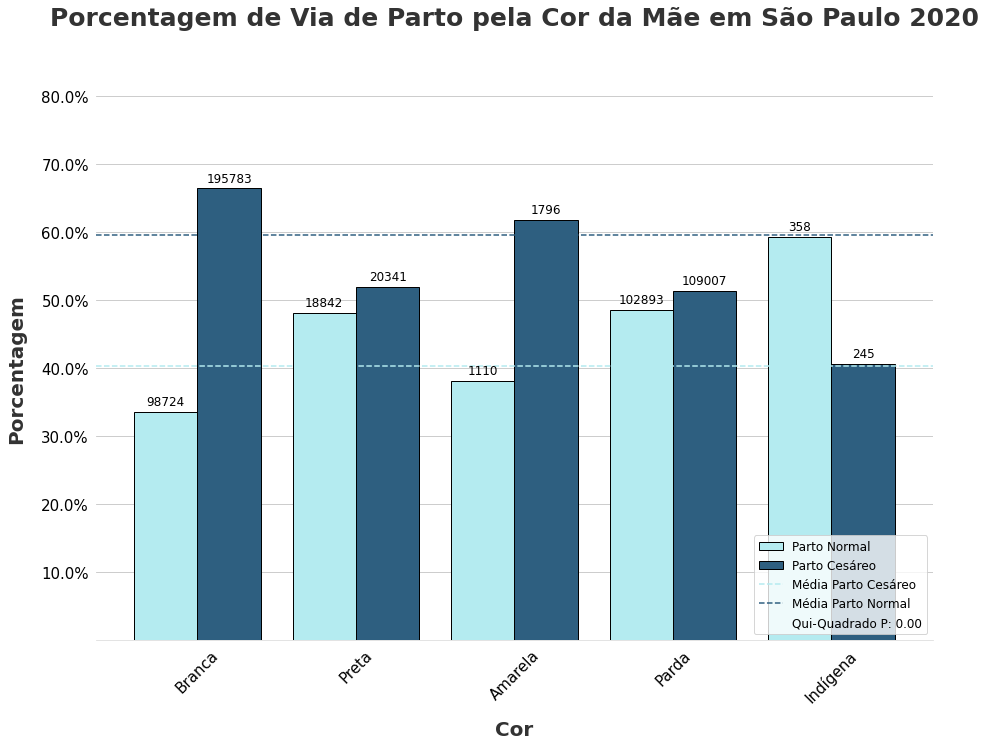

In [ ]:
desc = ['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena']
normal_prob = SP['PARTO'].value_counts()[1.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
cesario_prob = SP['PARTO'].value_counts()[0.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
SP['RACACORMAE'] = SP['RACACORMAE'].replace(9, np.nan)
SP.dropna()
crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['RACACORMAE'])
var = crosstable.columns.to_numpy()
normal = crosstable.iloc[1].to_numpy()
cesario = crosstable.iloc[0].to_numpy()
taxa_normal = normal / (normal + cesario)
taxa_cesario = cesario / (normal + cesario)
chi2, p, dof, expected = stats.chi2_contingency(crosstable)


fig, ax = plt.subplots(figsize=(15, 10))
width = 0.4
ind = np.arange(len(normal))

graph1 = ax.bar(var - width/2, taxa_normal, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
for x, y in zip(var, taxa_normal):
  ax.text(x - width/2, y+0.01, normal[int(x-1)], ha='center', fontsize=12)
graph2 = ax.bar(var + width/2, taxa_cesario, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
for x, y in zip(var, taxa_cesario):
  ax.text(x + width/2, y+0.01, cesario[int(x-1)], ha='center', fontsize=12)
graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#333333', alpha=0.3)
ax.xaxis.grid(False)
ax.set_xticks(var)
plt.xticks(fontsize=15 )
plt.yticks(np.arange(0.1, 0.9, 0.1), fontsize=15 )
ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'])
ax.set_xticklabels(desc, rotation=45)

ax.set_title(f'Porcentagem de Via de Parto pela Cor da Mãe em São Paulo 2020', color='#333333', weight='bold', fontsize=25, y=1.12)
ax.set_xlabel(f'Cor', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.set_ylabel('Porcentagem', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.legend([graph1, graph2, graph3, graph4, extra], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal', f'Qui-Quadrado P: {p:.2f}'], fontsize = 12, loc='lower right')
plt.savefig('RACADORMAE_SP_2020.png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
'''anos =  np.arange(2012, 2021)
for ano in anos:
  SP = pd.read_csv(f'/content/drive/Shareddrives/Data/DATA/SP/SP_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  SP['PARTO'] = SP['PARTO'].replace({1.0:1.0, 2.0:0.0})
  SP['PARTO'] = SP['PARTO'].replace(9.0, np.nan)
  SP['RACACORMAE'] = SP['RACACORMAE'].replace(9.0, np.nan)
  SP.dropna(axis=1)
  if anos[0] == ano:
    crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['RACACORMAE'])
  else:
    crosstable_ano = pd.crosstab(index=SP['PARTO'], columns=SP['RACACORMAE'])
    crosstable = pd.concat([crosstable, crosstable_ano])

crosstableCor = crosstable'''

normal = crosstableCor.index == 1.0
cesareo = crosstableCor.index == 0.0
df_normal = pd.DataFrame()
df_cesareo = pd.DataFrame()
for coluna in crosstableCor.columns:
  df_normal[f'RACACORMAE_{coluna}_NORMAL'] = crosstableCor[coluna][normal].to_numpy()
  df_cesareo[f'RACACORMAE_{coluna}_CESAREO'] = crosstableCor[coluna][cesareo].to_numpy()

desc = ['Branca', 'Preta', 'Amarela', 'Parda', 'Indígena']
fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
  if i == 5:
    fig.delaxes(axes[2,1])
    break
  width = 0.4
  normal = df_normal.iloc[:, i]
  cesareo = df_cesareo.iloc[:, i]
  Y1 =  normal / (normal + cesareo)
  Y2 = cesareo / (normal + cesareo)
  graph1 = ax.bar(anos - width/2, Y1, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
  graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
  graph2 = ax.bar(anos + width/2, Y2, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
  graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)
  ax.set_yticks(np.arange(0.1, 0.9, 0.1))
  ax.set_xticks(anos)
  ax.set_xticklabels(anos, fontsize=20, rotation=45)
  ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'], fontsize=20)
  ax.set_title(f'{desc[i]}', color='#333333', weight='bold', fontsize=25)

fig.legend([graph1, graph2, graph3, graph4], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal'], bbox_to_anchor = (0.8, 0.25), fontsize=20)
fig.text(0.50, 0.95, 'Porcentagem de Via de Parto pela Cor da Mãe em São Paulo', ha='center', color='#333333',  weight='bold', fontsize=30)
fig.text(0.50, 0.06, 'Anos', ha='center',  weight='bold', fontsize=25)
fig.text(0.03, 0.50, 'Porcentagem', va='center', rotation='vertical',  weight='bold', fontsize=25)
plt.savefig('RACACORMAE_SP_Anos.png', transparent=True, bbox_inches='tight')
plt.show()

## Estado Civil Mãe

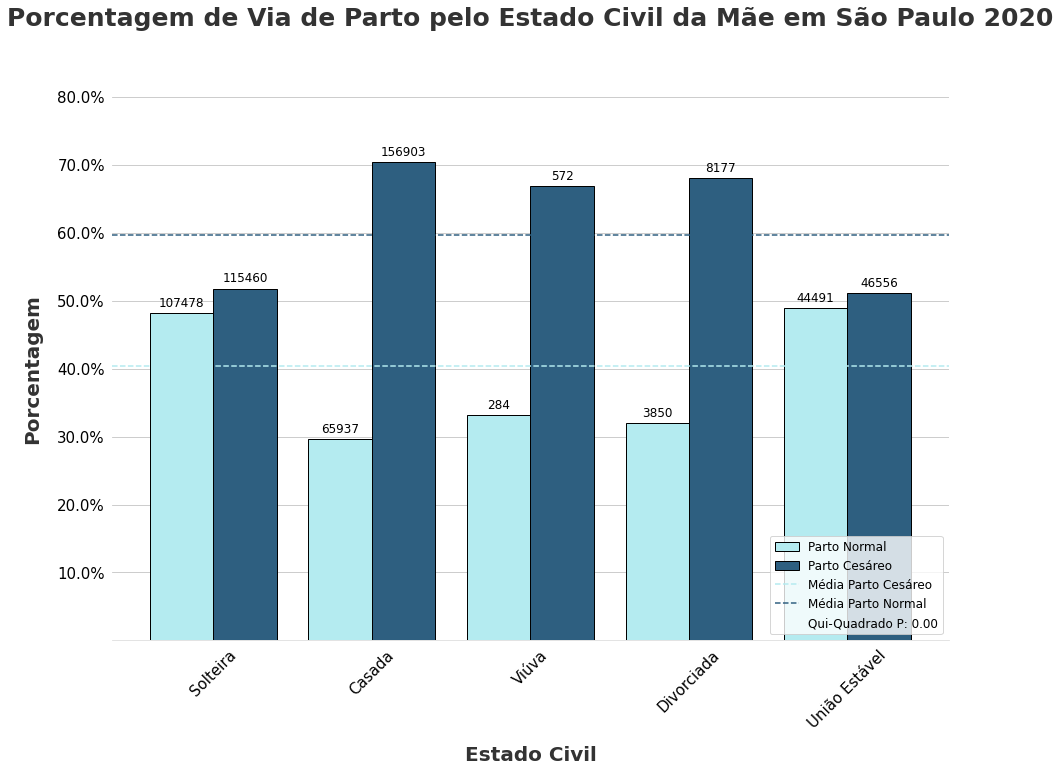

In [ ]:
desc = ['Solteira',  'Casada',  'Viúva', 'Divorciada',  'União Estável']
normal_prob = SP['PARTO'].value_counts()[1.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
cesario_prob = SP['PARTO'].value_counts()[0.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
SP['ESTCIVMAE'] = SP['ESTCIVMAE'].replace(9, np.nan)
SP.dropna()
crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['ESTCIVMAE'])
var = crosstable.columns.to_numpy()
normal = crosstable.iloc[1].to_numpy()
cesario = crosstable.iloc[0].to_numpy()
taxa_normal = normal / (normal + cesario)
taxa_cesario = cesario / (normal + cesario)
chi2, p, dof, expected = stats.chi2_contingency(crosstable)


fig, ax = plt.subplots(figsize=(15, 10))
width = 0.4
ind = np.arange(len(normal))

graph1 = ax.bar(var - width/2, taxa_normal, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
for x, y in zip(var, taxa_normal):
  ax.text(x - width/2, y+0.01, normal[int(x-1)], ha='center', fontsize=12)
graph2 = ax.bar(var + width/2, taxa_cesario, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
for x, y in zip(var, taxa_cesario):
  ax.text(x + width/2, y+0.01, cesario[int(x-1)], ha='center', fontsize=12)
graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#333333', alpha=0.3)
ax.xaxis.grid(False)
ax.set_xticks(var)
plt.xticks(fontsize=15 )
plt.yticks(np.arange(0.1, 0.9, 0.1), fontsize=15 )
ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'])
ax.set_xticklabels(desc, rotation=45)

ax.set_title(f'Porcentagem de Via de Parto pelo Estado Civil da Mãe em São Paulo 2020', color='#333333', weight='bold', fontsize=25, y=1.12)
ax.set_xlabel(f'Estado Civil', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.set_ylabel('Porcentagem', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.legend([graph1, graph2, graph3, graph4, extra], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal', f'Qui-Quadrado P: {p:.2f}'], fontsize = 12, loc='lower right')
plt.savefig('ESTCIVMAE_SP_2020.png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
'''
anos =  np.arange(2012, 2021)
for ano in anos:
  SP = pd.read_csv(f'/content/drive/Shareddrives/Data/DATA/SP/SP_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  SP['PARTO'] = SP['PARTO'].replace({1.0:1.0, 2.0:0.0})
  SP['PARTO'] = SP['PARTO'].replace(9.0, np.nan)
  SP['ESTCIVMAE'] = SP['ESTCIVMAE'].replace(9.0, np.nan)
  SP.dropna(axis=1)
  if anos[0] == ano:
    crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['ESTCIVMAE'])
  else:
    crosstable_ano = pd.crosstab(index=SP['PARTO'], columns=SP['ESTCIVMAE'])
    crosstable = pd.concat([crosstable, crosstable_ano])

crosstableEstCiv = crosstable'''


desc = ['Solteira',  'Casada',  'Viúva', 'Divorciada',  'União Estável']
normal = crosstableEstCiv.index == 1.0
cesareo = crosstableEstCiv.index == 0.0
df_normal = pd.DataFrame()
df_cesareo = pd.DataFrame()
for coluna in crosstableEstCiv.columns:
  df_normal[f'ESTCIVMAE_{coluna}_NORMAL'] = crosstableEstCiv[coluna][normal].to_numpy()
  df_cesareo[f'ESTCIVMAE_{coluna}_CESAREO'] = crosstableEstCiv[coluna][cesareo].to_numpy()

fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
  if i == 5:
    fig.delaxes(axes[2,1])
    break
  width = 0.4
  normal = df_normal.iloc[:, i]
  cesareo = df_cesareo.iloc[:, i]
  Y1 =  normal / (normal + cesareo)
  Y2 = cesareo / (normal + cesareo)
  graph1 = ax.bar(anos - width/2, Y1, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
  graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
  graph2 = ax.bar(anos + width/2, Y2, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
  graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)
  ax.set_yticks(np.arange(0.1, 0.9, 0.1))
  ax.set_xticks(anos)
  ax.set_xticklabels(anos, fontsize=20, rotation=45)
  ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'], fontsize=20)
  ax.set_title(f'{desc[i]}', color='#333333', weight='bold', fontsize=25)

fig.legend([graph1, graph2, graph3, graph4], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal'], bbox_to_anchor = (0.8, 0.25), fontsize=20)
fig.text(0.50, 0.95, 'Porcentagem de Via de Parto pelo Estado Civil da Mãe em São Paulo', ha='center', color='#333333',  weight='bold', fontsize=30)
fig.text(0.50, 0.06, 'Anos', ha='center',  weight='bold', fontsize=25)
fig.text(0.03, 0.50, 'Porcentagem', va='center', rotation='vertical',  weight='bold', fontsize=25)
plt.savefig('ESTCIVMAE_SP_Anos.png', transparent=True, bbox_inches='tight')
plt.show()

## Idade Mãe

In [ ]:
desc = ['Menor de 15',  '15-20',  '21-30', '31-40', '41-50', 'Maior de 51']
normal_prob = SP['PARTO'].value_counts()[1.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
cesario_prob = SP['PARTO'].value_counts()[0.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
SP.dropna()
crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['CATIDADEMAE'])
var = crosstable.columns.to_numpy()
normal = crosstable.iloc[1].to_numpy()
cesario = crosstable.iloc[0].to_numpy()
taxa_normal = normal / (normal + cesario)
taxa_cesario = cesario / (normal + cesario)
chi2, p, dof, expected = stats.chi2_contingency(crosstable)


fig, ax = plt.subplots(figsize=(15, 10))
width = 0.4
ind = np.arange(len(normal))

graph1 = ax.bar(var - width/2, taxa_normal, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
for x, y in zip(var, taxa_normal):
  ax.text(x - width/2, y+0.01, normal[int(x-1)], ha='center', fontsize=12)
graph2 = ax.bar(var + width/2, taxa_cesario, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
for x, y in zip(var, taxa_cesario):
  ax.text(x + width/2, y+0.01, cesario[int(x-1)], ha='center', fontsize=12)
graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xticks(var)
plt.xticks(fontsize=15 )
plt.yticks(np.arange(0.1, 0.9, 0.1), fontsize=15 )
ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'])
ax.set_xticklabels(desc, rotation=45)

ax.set_title(f'Porcentagem de Via de Parto pelo Idade Mãe da Mãe em São Paulo 2020', color='#333333', weight='bold', fontsize=25, y=1.12)
ax.set_xlabel(f'Idade Mãe', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.set_ylabel('Porcentagem', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.legend([graph1, graph2, graph3, graph4, extra], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal', f'Qui-Quadrado P: {p:.2f}'], fontsize = 12)
plt.savefig('CATIDADEMAE_SP_2020.png', transparent=True, bbox_inches='tight')
plt.show()

KeyError: ignored

def criarColunaCATIDADMAE(df):

  if (df['IDADEMAE'] <= 14):
    return 1

  elif ((df['IDADEMAE'] >= 15) & (df['IDADEMAE'] <= 20)):
    return 2

  elif( (df['IDADEMAE'] >= 21) & (df['IDADEMAE'] <= 30)):
    return 3

  elif ((df['IDADEMAE'] >= 31) & (df['IDADEMAE'] <= 40)):
    return 4

  elif ((df['IDADEMAE'] >= 41) & (df['IDADEMAE'] <= 50)):
    return 5
    
  elif (df['IDADEMAE'] >= 51):
    return 6

In [ ]:
desc = ['Menor de 15',  '15-20',  '21-30', '31-40', '41-50', 'Maior de 51']
'''anos =  np.arange(2012, 2021)
for ano in anos:
  SP = pd.read_csv(f'/content/drive/Shareddrives/Data/DATA/SP/SP_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  SP['PARTO'] = SP['PARTO'].replace({1.0:1.0, 2.0:0.0})
  SP['PARTO'] = SP['PARTO'].replace(9.0, np.nan)
  SP['CATIDADEMAE'] = SP.apply(lambda row: criarColunaCATIDADMAE(row), axis=1)
  SP['CATIDADEMAE'] = SP['CATIDADEMAE'].replace(9.0, np.nan)
  SP.dropna(axis=1)
  if anos[0] == ano:
    crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['CATIDADEMAE'])
  else:
    crosstable_ano = pd.crosstab(index=SP['PARTO'], columns=SP['CATIDADEMAE'])
    crosstable = pd.concat([crosstable, crosstable_ano])
crosstableIdade = crosstable.copy()'''

normal = crosstableIdade.index == 1.0
cesareo = crosstableIdade.index == 0.0
df_normal = pd.DataFrame()
df_cesareo = pd.DataFrame()
for coluna in crosstableIdade.columns:
  df_normal[f'CATIDADEMAE_{coluna}_NORMAL'] = crosstableIdade[coluna][normal].to_numpy()
  df_cesareo[f'CATIDADEMAE_{coluna}_CESAREO'] = crosstableIdade[coluna][cesareo].to_numpy()

fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
  width = 0.4
  normal = df_normal.iloc[:, i]
  cesareo = df_cesareo.iloc[:, i]
  Y1 =  normal / (normal + cesareo)
  Y2 = cesareo / (normal + cesareo)
  graph1 = ax.bar(anos - width/2, Y1, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
  graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
  graph2 = ax.bar(anos + width/2, Y2, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
  graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)
  ax.set_yticks(np.arange(0.1, 0.9, 0.1))
  ax.set_xticks(anos)
  ax.set_xticklabels(anos, fontsize=20, rotation=45)
  ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'], fontsize=20)
  ax.set_title(f'{desc[i]}', color='#333333', weight='bold', fontsize=25)

fig.legend([graph1, graph2, graph3, graph4], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal'], bbox_to_anchor = (0.57, 0.6), fontsize=20)
fig.text(0.50, 0.95, 'Porcentagem de Via de Parto pela Idade da Mãe em São Paulo', ha='center', color='#333333',  weight='bold', fontsize=30)
fig.text(0.50, 0.06, 'Anos', ha='center',  weight='bold', fontsize=25)
fig.text(0.03, 0.50, 'Porcentagem', va='center', rotation='vertical',  weight='bold', fontsize=25)
plt.savefig('CATIDADEMAE_SP_Anos.png', transparent=True, bbox_inches='tight')
plt.show()

## Peso ao Nascer

In [ ]:
desc = ['Menor de 1000g',  '1000g - 1500g',  '1500g - 2000g', '2000g - 2500g', '2500g - 3000g',  'Maior que 3000g']
normal_prob = SP['PARTO'].value_counts()[1.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
cesario_prob = SP['PARTO'].value_counts()[0.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
SP['CATPESO'] = SP['CATPESO'].replace(9, np.nan)
SP.dropna()
crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['CATPESO'])
var = crosstable.columns.to_numpy()
normal = crosstable.iloc[1].to_numpy()
cesario = crosstable.iloc[0].to_numpy()
taxa_normal = normal / (normal + cesario)
taxa_cesario = cesario / (normal + cesario)
chi2, p, dof, expected = stats.chi2_contingency(crosstable)


fig, ax = plt.subplots(figsize=(15, 10))
width = 0.4
ind = np.arange(len(normal))

graph1 = ax.bar(var - width/2, taxa_normal, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
for x, y in zip(var, taxa_normal):
  ax.text(x - width/2, y+0.01, normal[int(x-1)], ha='center', fontsize=12)
graph2 = ax.bar(var + width/2, taxa_cesario, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
for x, y in zip(var, taxa_cesario):
  ax.text(x + width/2, y+0.01, cesario[int(x-1)], ha='center', fontsize=12)
graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xticks(var)
plt.xticks(fontsize=15 )
plt.yticks(np.arange(0.1, 0.9, 0.1), fontsize=15 )
ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'])
ax.set_xticklabels(desc, rotation=45)

ax.set_title(f'Porcentagem de Via de Parto pelo Peso do Bebê em São Paulo 2020', color='#333333', weight='bold', fontsize=25, y=1.12)
ax.set_xlabel(f'Peso (gramas)', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.set_ylabel('Porcentagem', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.legend([graph1, graph2, graph3, graph4, extra], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal', f'Qui-Quadrado P: {p:.2f}'], fontsize = 12, loc='lower right')
plt.savefig('CATPESO_SP_2020.png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
desc = ['Menor de 1000g',  '1000g - 1500g',  '1500g - 2000g', '2000g - 2500g', '2500g - 3000g',  'Maior que 3000g']
anos =  np.arange(2012, 2021)
for ano in anos:
  SP = pd.read_csv(f'/content/drive/Shareddrives/Data/DATA/SP/SP_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  SP['PARTO'] = SP['PARTO'].replace({1.0:1.0, 2.0:0.0})
  SP['PARTO'] = SP['PARTO'].replace(9.0, np.nan)
  SP["CATPESO"] = SP.apply(lambda row: criarColunaPeso(row), axis=1)
  SP['CATPESO'] = SP['CATPESO'].replace(9.0, np.nan)
  SP.dropna(axis=1)
  if anos[0] == ano:
    crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['CATPESO'])
  else:
    crosstable_ano = pd.crosstab(index=SP['PARTO'], columns=SP['CATPESO'])
    crosstable = pd.concat([crosstable, crosstable_ano])

crosstablePeso = crosstable.copy()



normal = crosstablePeso.index == 1.0
cesareo = crosstablePeso.index == 0.0
df_normal = pd.DataFrame()
df_cesareo = pd.DataFrame()
for coluna in crosstablePeso.columns:
  df_normal[f'CATPESO_{coluna}_NORMAL'] = crosstablePeso[coluna][normal].to_numpy()
  df_cesareo[f'CATPESO_{coluna}_CESAREO'] = crosstablePeso[coluna][cesareo].to_numpy()

fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
  if i == 5:
    fig.delaxes(axes[2,1])
    break
  width = 0.4
  normal = df_normal.iloc[:, i]
  cesareo = df_cesareo.iloc[:, i]
  Y1 =  normal / (normal + cesareo)
  Y2 = cesareo / (normal + cesareo)
  graph1 = ax.bar(anos - width/2, Y1, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
  graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
  graph2 = ax.bar(anos + width/2, Y2, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
  graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)
  ax.set_yticks(np.arange(0.1, 0.9, 0.1))
  ax.set_xticks(anos)
  ax.set_xticklabels(anos, fontsize=20, rotation=45)
  ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'], fontsize=20)
  ax.set_title(f'{desc[i]}', color='#333333', weight='bold', fontsize=25)

fig.legend([graph1, graph2, graph3, graph4], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal'], bbox_to_anchor = (0.8, 0.25), fontsize=20)
fig.text(0.50, 0.95, 'Porcentagem de Via de Parto pelo Peso do Bebê em São Paulo', ha='center', color='#333333',  weight='bold', fontsize=30)
fig.text(0.50, 0.06, 'Anos', ha='center',  weight='bold', fontsize=25)
fig.text(0.03, 0.50, 'Porcentagem', va='center', rotation='vertical',  weight='bold', fontsize=25)
plt.savefig('CATPESO_SP_Anos.png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
df_normal

## Consultas Pré Natal

In [ ]:
desc = ['Nenhuma','1 a 3', '4 a 6', '7 ou mais']
normal_prob = SP['PARTO'].value_counts()[1.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
cesario_prob = SP['PARTO'].value_counts()[0.0] / (SP['PARTO'].value_counts()[1.0] + SP['PARTO'].value_counts()[0.0])
SP['CONSULTAS'] = SP['CONSULTAS'].replace(9, np.nan)
SP.dropna()
crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['CONSULTAS'])
var = crosstable.columns.to_numpy()
normal = crosstable.iloc[1].to_numpy()
cesario = crosstable.iloc[0].to_numpy()
taxa_normal = normal / (normal + cesario)
taxa_cesario = cesario / (normal + cesario)
chi2, p, dof, expected = stats.chi2_contingency(crosstable)


fig, ax = plt.subplots(figsize=(15, 10))
width = 0.4
ind = np.arange(len(normal))

graph1 = ax.bar(var - width/2, taxa_normal, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
for x, y in zip(var, taxa_normal):
  ax.text(x - width/2, y+0.01, normal[int(x-1)], ha='center', fontsize=12)
graph2 = ax.bar(var + width/2, taxa_cesario, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
for x, y in zip(var, taxa_cesario):
  ax.text(x + width/2, y+0.01, cesario[int(x-1)], ha='center', fontsize=12)
graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)
ax.set_xticks(var)
plt.xticks(fontsize=15 )
plt.yticks(np.arange(0.1, 0.9, 0.1), fontsize=15 )
ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'])
ax.set_xticklabels(desc, rotation=45)

ax.set_title(f'Porcentagem de Via de Parto pelo Número de Consutas da Mãe em São Paulo 2020', color='#333333', weight='bold', fontsize=25, y=1.12)
ax.set_xlabel(f'Número de Consultas', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.set_ylabel('Porcentagem', labelpad=15, color='#333333', fontsize=20, weight='bold')
ax.legend([graph1, graph2, graph3, graph4, extra], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal', f'Qui-Quadrado P: {p:.2f}'], fontsize = 12, loc='lower right')
plt.savefig('CONSULTAS_SP_2020.png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
desc = ['Nenhuma','1 a 3', '4 a 6', '7 ou mais']
anos =  np.arange(2012, 2021)
'''for ano in anos:
  SP = pd.read_csv(f'/content/drive/Shareddrives/Data/DATA/SP/SP_{ano}.csv').apply(pd.to_numeric, errors='ignore')
  SP['PARTO'] = SP['PARTO'].replace({1.0:1.0, 2.0:0.0})
  SP['PARTO'] = SP['PARTO'].replace(9.0, np.nan)
  SP['CONSULTAS'] = SP['CONSULTAS'].replace(9.0, np.nan)
  SP.dropna(axis=1)
  if anos[0] == ano:
    crosstable = pd.crosstab(index=SP['PARTO'], columns=SP['CONSULTAS'])
  else:
    crosstable_ano = pd.crosstab(index=SP['PARTO'], columns=SP['CONSULTAS'])
    crosstable = pd.concat([crosstable, crosstable_ano])'''

crosstableCons = crosstable.copy()

normal = crosstableCons.index == 1.0
cesareo = crosstableCons.index == 0.0
df_normal = pd.DataFrame()
df_cesareo = pd.DataFrame()
for coluna in crosstableCons.columns:
  df_normal[f'CONSULTAS_{coluna}_NORMAL'] = crosstableCons[coluna][normal].to_numpy()
  df_cesareo[f'CONSULTAS_{coluna}_CESAREO'] = crosstableCons[coluna][cesareo].to_numpy()

fig, axes = plt.subplots(2, 2, figsize=(20, 20), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
  if i == 5:
    fig.delaxes(axes[2,1])
    break
  width = 0.4
  normal = df_normal.iloc[:, i]
  cesareo = df_cesareo.iloc[:, i]
  Y1 =  normal / (normal + cesareo)
  Y2 = cesareo / (normal + cesareo)
  graph1 = ax.bar(anos - width/2, Y1, width, color='#B4EBF0', label='Parto Normal', edgecolor='black')
  graph3 = ax.axhline(y = normal_prob, color = '#B4EBF0', linestyle = '--', label='Média Parto Normal')
  graph2 = ax.bar(anos + width/2, Y2, width, color='#2E5F80', label='Parto Cesário', edgecolor='black')
  graph4 = ax.axhline(y = cesario_prob, color = '#2E5F80', linestyle = '--', label='Média Parto Cesário')
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_color('#DDDDDD')
  ax.tick_params(bottom=False, left=False)
  ax.set_axisbelow(True)
  ax.yaxis.grid(True, color='#EEEEEE')
  ax.xaxis.grid(False)
  ax.set_yticks(np.arange(0.1, 0.9, 0.1))
  ax.set_xticks(anos)
  ax.set_xticklabels(anos, fontsize=20, rotation=45)
  ax.set_yticklabels(['10.0%', '20.0%', '30.0%', '40.0%', '50.0%', '60.0%', '70.0%','80.0%'], fontsize=20)
  ax.set_title(f'{desc[i]}', color='#333333', weight='bold', fontsize=25)

fig.legend([graph1, graph2, graph3, graph4], ['Parto Normal', 'Parto Cesáreo', 'Média Parto Cesáreo', 'Média Parto Normal'], bbox_to_anchor = (0.8, 0.25), fontsize=20)
fig.text(0.50, 0.95, 'Porcentagem de Via de Parto pelo Número de Consultas da Mãe em São Paulo', ha='center', color='#333333',  weight='bold', fontsize=30)
fig.text(0.50, 0.06, 'Anos', ha='center',  weight='bold', fontsize=25)
fig.text(0.03, 0.50, 'Porcentagem', va='center', rotation='vertical',  weight='bold', fontsize=25)
plt.savefig('CONSULTAS_SP_Anos.png', transparent=True, bbox_inches='tight')
plt.show()

# Machine Learning

## Usando Testes de Hipótese para Verificar Correlação Entre as Coluas com a Via de Parto

Foram utilizados o teste qui-quadrado e V-Cramer para as colunas categóricas e ANOVA para as colunas numéricas.

In [ ]:
df_vcrammer = {'Nome':[], 'Parto Cesáreo':[], 'Parto Normal':[]}
for colum in colunas_cat:
  dummies = pd.get_dummies(SP[colum])
  num = 0.0
  for dummie in dummies:
    crostable = pd.crosstab(SP['PARTO'], dummies[dummie])
    chi2, p, dof, expected = stats.chi2_contingency(crostable)
    print('V-Cramer da coluna', colum)
    print(p)
    print('-'*100)

In [ ]:
print('-'*100)
for coluna in colunas_num:
  crostab = pd.crosstab(SP['PARTO'], SP[coluna])
  F, p = stats.f_oneway(*(crostab[colum] for colum in crostab.columns))
  print(f'{coluna}\npvalue:{p}\nfvalue{F}')
  print('-'*100)

## Resultados dos Testes de Hipóteses

Felizmete com todos ospvalue menores que 5%, as hipóteses nulas estão descartadas, como colunas selecionadas estão aparentemente correlacionadas com a via de parto, então as mesmas serão usadas nos possíveis algoritos de machine learning.

## Objetivo e Base de Dados

O objetivo finál deste estudo de caso é desenvollver um algoritmo treinado de machine learning para previsão da probabilidade de cada parto baseado em índices soxioeconomicos.
Como o SINASC disponibiliza o registro de múltiplos anos e cada tabela contém de 300 mil a 600 mil registros, utilizar a junção de todos os anos é inviável, pois o treinamento demoraria muito tempo. Más criando um dataframe com uma pequena parte de todas as tabelas, possívelmente será obtido a variabilidade de dados e um tempo de treinamento adequado.

Peso do bebe por via de parto


In [ ]:
colunas_categoricas = ['CODMUNRES', 'PARTO', 'ESCMAE2010', 'ESTCIVMAE', 
                       'RACACORMAE', 'MESPRENAT', 'CONSULTAS', 
                       'GRAVIDEZ', 'STTRABPART']

colunas_numericas = ['PESO', 'SEMAGESTAC',  'DTULTMENST', 'IDADEMAE', 
                     'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'QTDFILVIVO', 
                     'QTDFILMORT']

colunas_dummies = ['CODMUNRES', 'ESCMAE2010', 'ESTCIVMAE', 'RACACORMAE', 
                   'MESPRENAT', 'CONSULTAS', 'GRAVIDEZ']

todas_colunas = ['CODMUNRES', 'PARTO', 'ESCMAE2010', 'ESTCIVMAE', 'RACACORMAE', 'MESPRENAT', 
                'CONSULTAS', 'PESO', 'SEMAGESTAC', 'GRAVIDEZ', 'STTRABPART', 'DTULTMENST'
                ,'IDADEMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 
               'QTDFILVIVO', 'QTDFILMORT']


 

np.random.seed(0)


def criarColunaPrematuro(df):
  if df['SEMAGESTAC'] >= 40:
    return 0
  elif df['SEMAGESTAC'] < 40:
    return 1

def criarColunaPeso(df):
  if df['PESO'] >= 2500.0:
    return 0
  elif df['PESO'] < 2500.0:
    return 1


for ano in np.arange(2018, 2021):
  SP_ano =  pd.read_csv(f'/content/drive/MyDrive/SINASC/Data/SP/SP_{ano}.csv').apply(pd.to_numeric, errors='ignore')[todas_colunas]
  SP_ano[colunas_categoricas] = SP_ano[colunas_categoricas].replace(9.0, np.nan)
  SP_ano = SP_ano.dropna()
  index = np.random.randint(0, SP_ano.shape[0], 30000)
  if ano == 2018:
    SP = SP_ano.iloc[index, :]
  else:
    SP_ano = SP_ano.iloc[index, :]
    SP = pd.concat([SP, SP_ano])
  print('O ano ', ano, 'foi adionado com sucesso!')

SP['PARTO'] = SP['PARTO'].replace({1.0:1.0, 2.0:0.0})
SP['STTRABPART'] = SP['STTRABPART'].replace({1.0:1.0, 2.0:0.0})
SP = pd.get_dummies(SP, columns=colunas_dummies)
SP.to_csv('/content/drive/MyDrive/SINASC/Data/SP/SP_2012_2020.csv')
SP["NASCPREMAT"] = SP.apply(lambda row: criarColunaPrematuro(row), axis=1)
SP["ABAIXOPESO"] = SP.apply(lambda row: criarColunaPeso(row), axis=1)
SP

In [ ]:
X = SP.drop(['PARTO', 'PESO', 'NASCPREMAT', 
             'ABAIXOPESO', 'STTRABPART'], axis=1)
X

In [ ]:
y = SP['PARTO']
y

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 



model = LogisticRegression() # Definindo modelo
model.fit(X_train, y_train) # Treinando o modelo com os Dados de X_test e y_test
y_pred = model.predict(X_test) # Predizendo os valores de y_test com a matriz X_test


print('Classification Report')
print(classification_report(y_test, y_pred))
print('Matriz de Confusão')
plot_confusion_matrix(model, X_test, y_test)

In [ ]:
675*(2/3)

In [ ]:
import tensorflow as tf


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(450, activation="relu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(200, activation="selu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(100, activation="elu"),
  tf.keras.layers.BatchNormalization(),
  tf.keras.layers.Dense(2, activation="softmax")
])

model.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])





model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

In [ ]:
X = SP.drop(['PARTO', 'PESO', 'NASCPREMAT', 
             'ABAIXOPESO', 'STTRABPART'], axis=1)
X

In [ ]:
y = SP['PESO']
y

In [ ]:
import tensorflow as tf


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(44, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(22, activation="selu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(10, activation="elu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
])


optimizer = tf.keras.optimizers.Adam()

model.compile(loss='mse',
              optimizer=optimizer,
              metrics=['mae', 'mse'])




model.fit(X_train, y_train, epochs=10)
model.evaluate(X_test, y_test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
y_pred_df = y_pred.reshape(-1, )
y_teste_df = y_test.to_numpy()
diference = y_teste_df - y_pred_df



df = pd.DataFrame({
              'Y_pred': y_pred_df, 
              'Y_True': y_teste_df,
              'Diference': diference
              })

In [ ]:
df['Diference'].sum() / len(df['Diference'])

In [ ]:
colunas = X.columns
pesos = model.get_layer("dense_42").weights[0][-1]

colunas_modelo = []
pesos_modelo = []
for i in range(len(pesos)):
  colunas_modelo.append(colunas[i])
  pesos_modelo.append(pesos[i].numpy())

df = pd.DataFrame({'Colunas':colunas_modelo, 'Pesos':pesos_modelo})
df = df.sort_values(by = 'Pesos')
df

In [ ]:
filtro = df.loc[((df['Pesos'] < 0.05) & (df['Pesos'] > -0.1))]
filtro = filtro['Colunas'].to_list()
filtro

Slide 1: Serie Temporal (scatter) do % de partos vaginal e partos normais nos últimos 10 anos:
- SP, CE, BRA
1 - Serie Temporal  do % de partos vaginal e partos normais nos últimos 10 anos:
- SP, CE, BRA
Cristiano Torezzan21:07
1 - Serie Temporal  do % de partos cesarep e partos normais nos últimos 10 anos:
- SP, CE, BRA
1 - Serie Temporal  do % de partos cesáreo e partos normais nos últimos 10 anos:
- SP, CE, BRA
Cristiano Torezzan21:10
2 - Variáveis aderentes:
- ESCOLARIDADE
- IDADE MAE
- EST. CIVIL
- RACA/COR

3 - Investigar:
- PESO AO NASCER
- CONSULTAS
- APGAR
Cristiano Torezzan21:11
Para a parte 2, fazer um teste de Chi-Square
Cristiano Torezzan21:20
https://analyticsindiamag.com/a-beginners-guide-to-chi-square-test-in-python-from-scratch/